There are many kind of regression techiniques in Data Science. I will discuss about 3 of them. But at first we need to understand what is regression analysis. Simply put, regression analysis is analyzing the relationship between a dependent variable and one or more independent variables. It describes how the variables contribute to the cause and shape the result of an event.

### 1. Linear Regression: 

When we have single or multiple linearly continuous dependent variables and an independent variable then finding the best relation of how they are related can be defined as linear regression. The relationship among them is also linear in nature. It is also important to check the outliers because linear regression is sensitive to outliers.
* When we have one independent variable and one dependent variable, it is known as simple linear regression.
* When we have more than one independent variable and one dependent variable, it is known as Multiple linear regression.

You can think of it in this way - you have a pile of data points x1, x2, x3,...,xn and y1, y2, y3,...,yn. Now you need to find the relationship such as yi= aixi+b, where a is known as the slope, and b is commonly known as the intercept. Let's have some example of simple linear regreassion.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import numpy as np

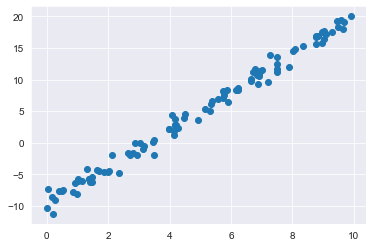

In [2]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(100)
y = 3 * x - 10 + rng.randn(100)
plt.scatter(x, y);

Now we can use scikit-learn's LinearRegression to find the best fitted line. 

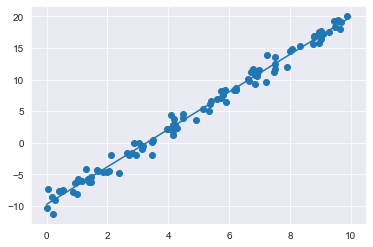

In [3]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression(fit_intercept=True)

lm.fit(x[:, np.newaxis], y)

x_fit = np.linspace(0, 10, 1000)
y_fit = lm.predict(x_fit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(x_fit, y_fit);

In [4]:
print("The slope is:    ", lm.coef_[0])
print("The intercept is:", lm.intercept_)

The slope is:     2.9684925087655323
The intercept is: -9.763042745851093


The LinearRegression estimator can also handle multidimensional linear models of the form: 

                   y= b+ a1x1+ a2x2+ ⋯ + anxn

### 2. Polynomial Regression : 

Polynomial regression can be defined as a technique to fit a nonlinear equation by taking polynomial functions of independent variable. if fn(x)=x^n, our model becomes a polynomial regression:
                                  
                                  y= b+ a1x + a2x^2 + a3x^3 +.....
                          
If we try to fit a linear model to curved data, a scatter plot of dependent data on the independent data will have patches of many outliers in the middle. In many research arenas where complex data are generated linear regression won't be sufficient enough. Hence the need of polynomial regression. We can describe many complex phenomena such as-growth rate of cells or spreading of viruses. Let's go through some examples: 

In [5]:
from sklearn.preprocessing import PolynomialFeatures
x = np.array([1, 2, 3])
pol = PolynomialFeatures(3, include_bias=False)
pol.fit_transform(x[:, None])

array([[ 1.,  1.,  1.],
       [ 2.,  4.,  8.],
       [ 3.,  9., 27.]])

We see here that the transformer has converted our one-dimensional array into a three-dimensional array by taking the exponents of each value. Now this higher degree data can then be put through a linear regression. The best way to do that is using a pipeline.

In [6]:
from sklearn.pipeline import make_pipeline
poly_reg = make_pipeline(PolynomialFeatures(6),LinearRegression())

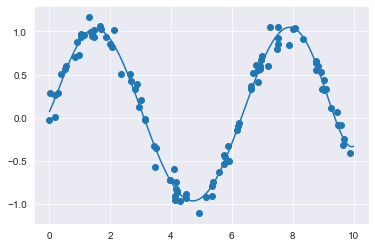

In [7]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(100)
y = np.sin(x) + 0.1 * rng.randn(100)

poly_reg.fit(x[:, np.newaxis], y)
y_fit = poly_reg.predict(x_fit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(x_fit, y_fit)


So we see our model used 6th-order polynomial basis functions and it provided an wonderful fit to this non-linear data!



### 3. Logistic Regression: 

The definition of logistic regression lies in its name. It is a statistical method that uses a logistic function, more specificaly Sigmoid function to give predictions of discrete or categorical dependent variable. For example,
to predict whether an email is spam (1) or not (0) or if the weather is Sunny(1) or Cloudy(0). Linear regression won't be useful in these cases. Because then we have to clip the fitted line at 0 and  1, which will give us sharp straight lines and there will be many important and not considered or fitted data points. So the solution is logistic Regression.  

There are typically three kinds of logistic regression :

1. Binary : 0 or 1
2. Ordinal : 3 or more discrete values with ordering
3. Multinomial : 3 or more discrete values without ordering

The sigmoid function is : 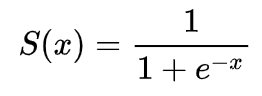

 
                                   Image Source:[By Qef (talk)](https://commons.wikimedia.org/w/index.php?curid=4310325)

Many people might not want to call it a regression model, but it actually is one. It becomes a classification technique only if you put a decision threshold. The threshold value is a very important aspect of Logistic regression. Like when you set the prediction threshold is 0.5, then if the value is greater than 0.5 then it is Spam otherwise it is not. 

Let's work on some dataset to see how well logistic regression works: 

In [8]:
import pandas as pd
ad_data = pd.read_csv('advertising.csv')
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


I will do train-test split on this data set, you can download this dataset from [here]()

In [9]:
from sklearn.model_selection import train_test_split
X = ad_data[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male']]
y = ad_data['Clicked on Ad']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=100)

In [10]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression(solver= 'lbfgs')
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [11]:
predictions = logmodel.predict(X_test)

To understand if our logistic model has performed well or not we need to use some metric. In this case precision and recall score are very important to consider. We will check that now : 

In [12]:
from sklearn.metrics import classification_report

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89       156
           1       0.94      0.84      0.89       174

    accuracy                           0.89       330
   macro avg       0.89      0.89      0.89       330
weighted avg       0.90      0.89      0.89       330



Well, we see the scores are not that bad, but there is always room for improvements. These are the main three regressions people learn when they start learning data science or machine learning. I did too. There are also other noteworthy regression such as - quantile, ridge or lasso regression. I will try to describe them in another article.